In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_history(csv_file, legend_dict=None):
    # Read CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file)

    # Extract data
    epochs = df['epoch']
    loss = df['loss']
    mse = df['mse']
    avg_output_vector = df['avg_output_vector']
    avg_label_vector = df['avg_label_vector']
    avg_correct = df['avg_correct']

    # Convert string representations of arrays to NumPy arrays
    avg_output_vector = avg_output_vector.apply(lambda x: np.fromstring(x[1:-1], sep=' '))
    avg_label_vector = avg_label_vector.apply(lambda x: np.fromstring(x[1:-1], sep=' '))

    # Plot curves
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    ax[0][0].plot(epochs, loss)
    ax[0][0].set_title('Loss')
    ax[0][1].plot(epochs, mse)
    ax[0][1].set_title('MSE')
    for i in range(avg_output_vector[0].size):
        ax[1][0].plot(epochs, avg_output_vector.apply(lambda x: x[i]), label=f'Output {i}')
    ax[1][0].set_title('Average Output Vector')
    ax[1][0].legend()
    for i in range(avg_label_vector[0].size):
        ax[1][1].plot(epochs, avg_label_vector.apply(lambda x: x[i]), label=f'Label {i}')
    ax[1][1].set_title('Average Label Vector')
    ax[1][1].legend()
    for i in range(avg_output_vector[0].size):
        ratio = avg_output_vector.apply(lambda x: x[i]) / avg_label_vector.apply(lambda x: x[i])
        ax[2][0].plot(epochs, ratio, label=f'Output {i}')
    ax[2][0].set_title('Ratio of Average Output Vector to Average Label Vector')
    # set ylim from 0 to 1
    ax[2][0].set_ylim(0, 3)
    
    fig.suptitle('Training History')
    plt.show()

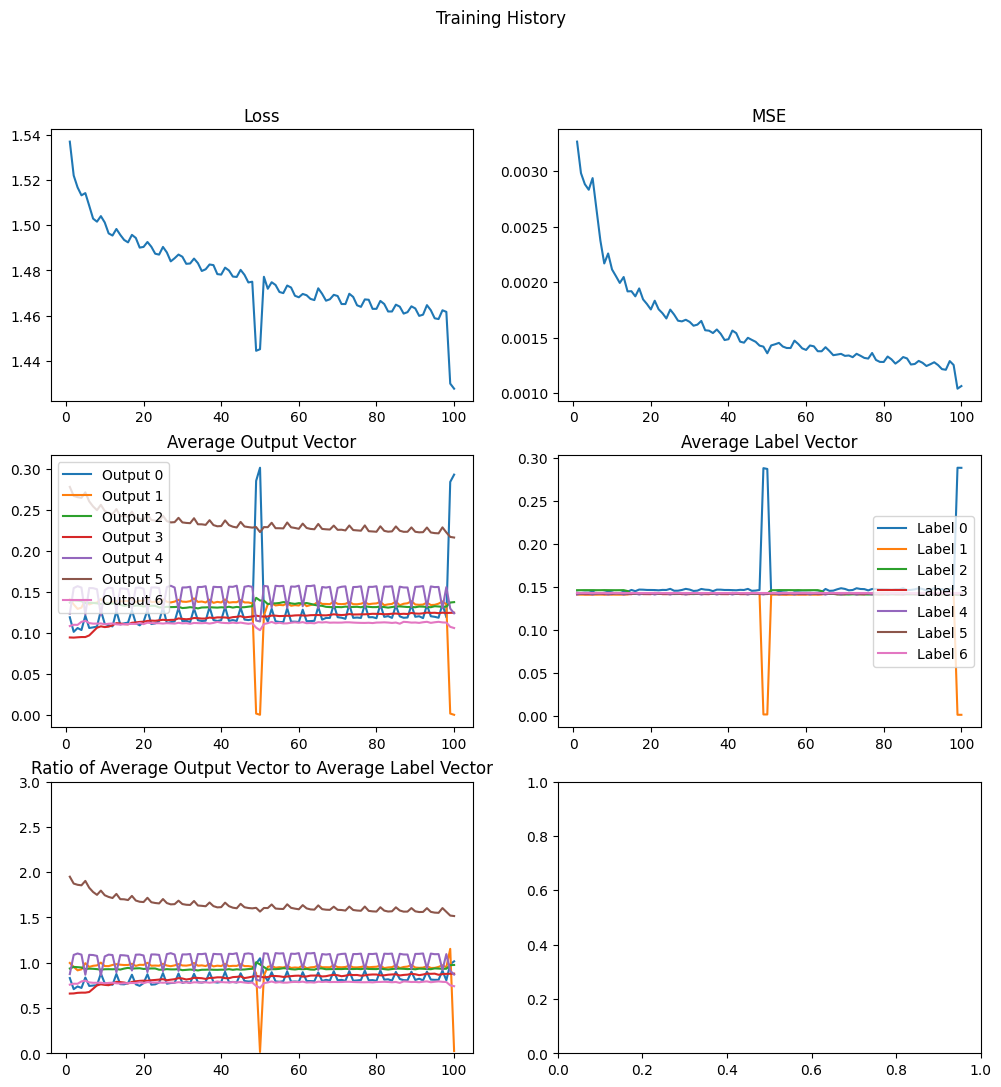

In [2]:
plot_history('training_history_balanced_10-4.csv')

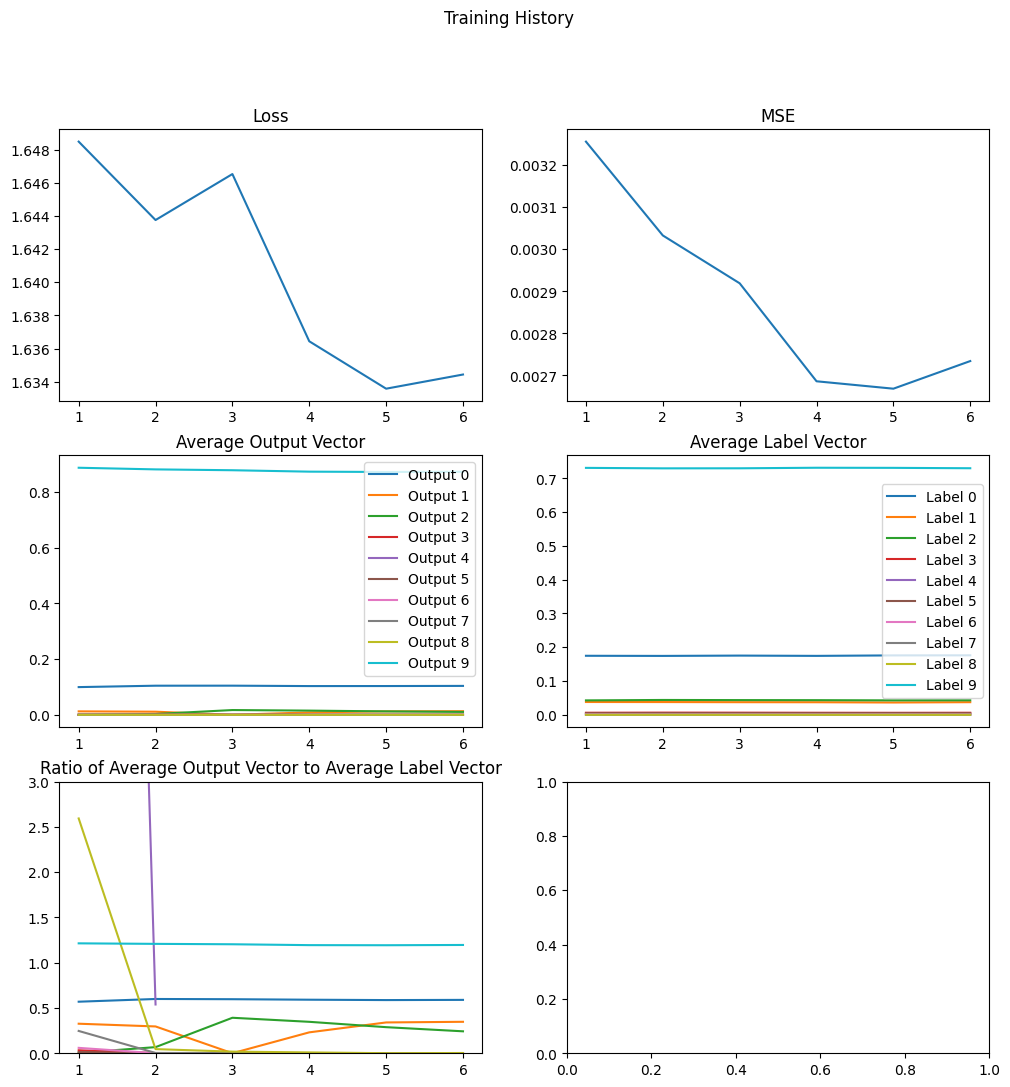

In [43]:
plot_history('training_history_lr10-3.csv')